In [1]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

estimator：对象。构建特征选择实例的基本分类器。如果参数prefit为True，则该参数可以由一个已经训练过的分类器初始化。如果prefit为False，则该参数只能传入没有经过训练的分类器实例
threshold：字符串，浮点数，（可选的）默认为None。该参数指定特征选择的阈值，词语在分类模型中对应的系数值大于该值时被保留，否则被移除。如果该参数为字符串类型，则可设置的值有”mean”表示系数向量值的均值，”median”表示系数向量值的中值，也可以为”0.x*mean”或”0.x*median”。当该参数设置值为None时，如果分类器具有罚项且罚项设置为l1，则阈值为1e-5，否则该值为”mean”
prefit：布尔类型。默认值为False。是否对传入的基本分类器事先进行训练。如果设置该值为True，则需要对传入的基本分类器进行训练，如果设置该值为False，则只需要传入分类器实例即可

In [ ]:
使用L1范数作为惩罚项的:ref:Linear models会得到稀疏解：大部分特征对应的系数为0。当你希望减少特征的维度
以用于其它分类器时，可以通过 feature_selection.SelectFromModel 来选择不为0的系数。特别指出，常用于此目的
的稀疏预测模型有：

回归： linear_model.Lasso

对于Lasso，参数alpha越大，被选中的特征越少 。
分类： linear_model.LogisticRegression 和 svm.LinearSVC

对于SVM和逻辑回归，参数C控制稀疏性：C越小，被选中的特征越少。

In [8]:
wine=datasets.load_wine()
x,y=wine.data,wine.target
#选择模型，可以不先进行训练
model=LogisticRegression(penalty="l1", C=0.5)
#设置特征选取模型，prefit表示是否自己预先进行训练，是的话选择True,否选择False,然后进行fit_transform，表示先训练
#再转化特征
selector=SelectFromModel(model,prefit=False,threshold=0.1)#特征阀值为一个超参数，这里通过迭代选择
#进行特征选择
n_feature=selector.fit_transform(x,y).shape[1]
while n_feature<8:
    selector.threshold-=0.02
    n_feature=selector.transform(x).shape[1]

print(selector.threshold,selector.get_support(True))

0.039999999999999994 [ 0  1  3  4  6  8  9 11]


In [16]:
from sklearn.svm import LinearSVC
linearsvc=LinearSVC(C=1)
linearsvc.fit(x,y)
selector=SelectFromModel(linearsvc,threshold=0.1,prefit=True)
new_x=selector.transform(x)
print(new_x.shape)

(178, 8)


In [11]:
from sklearn.linear_model import Lasso
lr = Lasso(alpha=1)
lr.fit(x,y)
#带L1惩罚项的逻辑回归作为基模型的特征选择
model = SelectFromModel(lr, prefit=True,threshold=0.1)
n_feature=model.transform(x).shape[1]
while n_feature<8:
    model.threshold-=0.02
    n_feature=model.transform(x).shape[1]
    
print(model.threshold,model.get_support(True))

-6.938893903907228e-18 [ 0  1  2  3  4  5  6  7  8  9 10 11 12]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\base.py:80: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)


In [12]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LassoCV
clf = LassoCV()

# Set a minimum threshold of 0.25
sfm = SelectFromModel(clf, prefit=False,threshold=0.01)
n_features = sfm.fit_transform(x,y).shape[1]  # 初始满足阈值后留下的特征
# Reset the threshold till the number of features equals two.
# Note that the attribute can be set directly instead of repeatedly
# fitting the metatransformer.
# 开始不断的进行阈值攀升，直到有特征不满足被砍掉
while n_features > 5:
    sfm.threshold += 0.05
    X_transform = sfm.transform(x)
    n_features = X_transform.shape[1]

print(sfm.threshold,sfm.get_support(True))
# Plot the selected two features from X.
#plt.title(
#    "Features selected from Boston using SelectFromModel with "
#    "threshold %0.3f." % sfm.threshold)
#feature1 = X_transform[:, 0]
#feature2 = X_transform[:, 1] 
#plt.plot(feature1, feature2, 'r.')
#plt.xlabel("Feature number 1")
#plt.ylabel("Feature number 2")
#plt.ylim([np.min(feature2), np.max(feature2)])  # ylim 设置y轴的范围
#plt.show()

0.01 []


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\base.py:80: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)


## 支持向量机做选择

In [16]:
from sklearn.svm import LinearSVC
from sklearn.datasets import load_wine
from sklearn.feature_selection import SelectFromModel
wine = load_wine()
X, y = wine.data, wine.target
X.shape
# (150, 4)
lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(X,y)  # 这里的惩罚项是L1,别看做是11，这里L是小写
model = SelectFromModel(lsvc, prefit=True,threshold=1e-4)
n_feature = model.transform(X).shape[1]
while n_feature>9:
    model.threshold+=5*1e-4
    n_feature=model.transform(X).shape[1]

print(model.threshold,model.get_support(True))    
# 选取的前三行看一下

0.0001 [ 3  4  6  9 12]


# 基于树做特征选择

In [22]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import GradientBoostingRegressor

gbdt = GradientBoostingRegressor()
gbdt.fit(X,y)

#GBDT作为基模型的特征选择
model = SelectFromModel(gbdt, prefit=True)
new_x=model.transform(x)
print(new_x.shape)

(178, 4)


## 基于树模型特征选择，随机森林（回归与分类），提升树

In [23]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf = clf.fit(X, y)
print(clf.feature_importances_)   # 显示每一个特征的重要性指标，越大说明越重要，可以看出，第三第四两个特征比较重要
# [ 0.04505659  0.01056346  0.45428591  0.49009404]
model = SelectFromModel(clf, prefit=True)
X_new = model.transform(X)
print(X_new.shape)          

[0.13829469 0.06187528 0.01256657 0.00683051 0.0070943  0.10201006
 0.16383881 0.02063444 0.0194219  0.15887365 0.08179198 0.04418625
 0.18258155]
(178, 6)


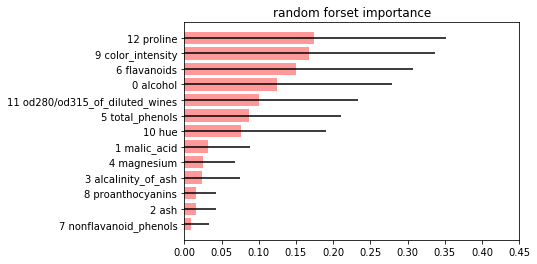

In [27]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import load_boston
boston=load_boston()
x, y = wine.data, wine.target
feature_name = np.array(["%d %s"%(b,a) for a,b in zip(wine.feature_names,range(len(boston.feature_names)))])
rf = RandomForestClassifier(n_estimators=100, random_state=101).fit(x,y)
importance = np.mean([tree.feature_importances_ for tree in rf.estimators_], axis=0)
std = np.std([ tree.feature_importances_ for tree in rf.estimators_],axis=0)
indices = np.argsort(importance)
range_ = range(len(importance))

plt.figure()
plt.title("random forset importance")
plt.barh(range_, importance[indices],color='r',xerr=std[indices],alpha=0.4,align='center')
plt.yticks(range(len(importance)),feature_name[indices])
plt.ylim([-1,len(importance)])
plt.xlim([0.0,0.45])
plt.show()